<a href="https://colab.research.google.com/github/Karimi-Gichunge/NN-Model/blob/main/Neural_Networks_1911595891_a1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.0f}'.format

In [2]:
df = pd.read_excel("/content/1911595891_a1a.xlsx")
df.head(10)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15
0,-1,3,11,14,19,39,42,55,64,67,73,75,76,80,83
1,-1,3,6,17,27,35,40,57,63,69,73,74,76,81,103
2,-1,4,6,15,21,35,40,57,63,67,73,74,77,80,83
3,-1,5,6,15,22,36,41,47,66,67,72,74,76,80,83
4,-1,2,6,16,22,36,40,54,63,67,73,75,76,80,83
5,-1,2,6,14,20,37,41,47,64,67,73,74,76,82,83
6,-1,1,6,14,22,36,42,49,64,67,72,74,77,80,83
7,-1,1,6,17,19,39,42,53,64,67,73,74,76,80,83
8,-1,2,6,18,20,37,42,48,64,71,73,74,76,81,83
9,1,5,11,15,32,39,40,52,63,67,73,74,76,78,83


In [3]:
df.tail(10)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15
1595,-1,4,6,17,33,35,40,54,63,67,73,74,76,80,nan
1596,-1,1,6,17,20,37,42,50,64,67,72,74,76,82,83
1597,1,4,8,14,29,39,40,50,63,67,73,74,76,82,nan
1598,-1,5,11,17,27,35,40,49,61,71,72,74,76,80,83
1599,-1,2,6,15,22,36,40,54,61,67,72,74,76,80,83
1600,-1,3,6,14,22,36,41,55,66,71,72,74,76,80,83
1601,-1,4,7,17,22,36,41,50,62,67,73,74,76,82,nan
1602,-1,1,6,18,21,35,42,52,62,67,73,74,76,78,83
1603,-1,1,6,18,22,36,42,48,65,71,73,74,76,80,83
1604,-1,4,10,15,24,38,41,52,66,67,72,74,76,82,83


In [4]:
#Checking for shape, missing values and data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column1   1605 non-null   int64  
 1   Column2   1605 non-null   int64  
 2   Column3   1605 non-null   int64  
 3   Column4   1605 non-null   int64  
 4   Column5   1605 non-null   int64  
 5   Column6   1605 non-null   int64  
 6   Column7   1605 non-null   int64  
 7   Column8   1605 non-null   int64  
 8   Column9   1605 non-null   int64  
 9   Column10  1605 non-null   int64  
 10  Column11  1605 non-null   int64  
 11  Column12  1605 non-null   int64  
 12  Column13  1605 non-null   int64  
 13  Column14  1511 non-null   float64
 14  Column15  1478 non-null   float64
dtypes: float64(2), int64(13)
memory usage: 188.2 KB


In [5]:
#Dropping rows with missing values
df1 = df.dropna(axis=0)
df1.shape

(1478, 15)

In [6]:
#Checking for duplicates
duplicates = df1[df1.duplicated()]

print("Shape of duplicated rows: ", duplicates.shape)

#Removing duplicated rows
df1 = df1.copy()
df2 = df1.drop_duplicates()


Shape of duplicated rows:  (30, 15)


In [7]:
#Checking for unique values for column1
uniqvals = df2['Column1'].unique()
uniqvals

array([-1,  1])

##Modelling

**1. Data Pre-processing**

Since column1 has two values(-1, 1) we will use this column as our **target variable** during modelling

Also, we will replace the value -1 with 0 to make modelling more efficient. Hence the values of our target variable will be **0 and 1**.

Our model is therefore a **binary classification**

In [8]:
#Replacing -1 with 0
df2 = df2.copy()
df2.loc[df2.Column1 == -1, 'Column1'] = 0

df2.head(15)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15
0,0,3,11,14,19,39,42,55,64,67,73,75,76,80,83
1,0,3,6,17,27,35,40,57,63,69,73,74,76,81,103
2,0,4,6,15,21,35,40,57,63,67,73,74,77,80,83
3,0,5,6,15,22,36,41,47,66,67,72,74,76,80,83
4,0,2,6,16,22,36,40,54,63,67,73,75,76,80,83
5,0,2,6,14,20,37,41,47,64,67,73,74,76,82,83
6,0,1,6,14,22,36,42,49,64,67,72,74,77,80,83
7,0,1,6,17,19,39,42,53,64,67,73,74,76,80,83
8,0,2,6,18,20,37,42,48,64,71,73,74,76,81,83
9,1,5,11,15,32,39,40,52,63,67,73,74,76,78,83


In [117]:
#Importing necessary libraries for modelling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools

In [111]:
def plotCf(a,b,t):
    cf =confusion_matrix(a,b)
    plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    tick_marks = np.arange(len(set(a))) # length of classes
    class_labels = ['0','1']
    plt.xticks(tick_marks,class_labels)
    plt.yticks(tick_marks,class_labels)
    thresh = cf.max() / 2.
    for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
    plt.show();

In [169]:
#Creating the Neural Network
def Sigmoid(Z):
    return 1/(1+np.exp(-Z))

def Relu(Z):
    return np.maximum(0,Z)

def dRelu2(dZ, Z):    
    dZ[Z <= 0] = 0    
    return dZ

def dRelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def dSigmoid(Z):
    s = 1/(1+np.exp(-Z))
    dZ = s * (1-s)
    return dZ

class dlnet:
    def __init__(self, x, y):
        self.debug = 0;
        self.X=x
        self.Y=y
        self.Yh=np.zeros((1,self.Y.shape[1])) 
        self.L=2
        self.dims = [14, 10, 1] 
        self.param = {}
        self.ch = {}
        self.grad = {}
        self.loss = []
        self.lr=0.003
        self.sam = self.Y.shape[1]
        self.threshold=0.5
        
    def nInit(self):    
        np.random.seed(1)
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0]) 
        self.param['b1'] = np.zeros((self.dims[1], 1))        
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1]) 
        self.param['b2'] = np.zeros((self.dims[2], 1))                
        return 

    def forward(self):    
        Z1 = self.param['W1'].dot(self.X) + self.param['b1'] 
        A1 = Relu(Z1)
        self.ch['Z1'],self.ch['A1']=Z1,A1
        
        Z2 = self.param['W2'].dot(A1) + self.param['b2']  
        A2 = Sigmoid(Z2)
        self.ch['Z2'],self.ch['A2']=Z2,A2

        self.Yh=A2
        loss=self.nloss(A2)
        return self.Yh, loss

    def nloss(self,Yh):
        loss = (1./self.sam) * (-np.dot(self.Y,np.log(Yh).T) - np.dot(1-self.Y, np.log(1-Yh).T))    
        return loss

    def backward(self):
        dLoss_Yh = - (np.divide(self.Y, self.Yh ) - np.divide(1 - self.Y, 1 - self.Yh))    
        
        dLoss_Z2 = dLoss_Yh * dSigmoid(self.ch['Z2'])    
        dLoss_A1 = np.dot(self.param["W2"].T,dLoss_Z2)
        dLoss_W2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2,self.ch['A1'].T)
        dLoss_b2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1],1])) 
                            
        dLoss_Z1 = dLoss_A1 * dRelu(self.ch['Z1'])        
        dLoss_A0 = np.dot(self.param["W1"].T,dLoss_Z1)
        dLoss_W1 = 1./self.X.shape[1] * np.dot(dLoss_Z1,self.X.T)
        dLoss_b1 = 1./self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1]))  
        
        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2
        
        return


    def pred(self,x, y):  
        self.X=x
        self.Y=y
        comp = np.zeros((1,x.shape[1]))
        pred, loss= self.forward()    
    
        for i in range(0, pred.shape[1]):
            if pred[0,i] > self.threshold: comp[0,i] = 1
            else: comp[0,i] = 0
    
        print("Acc: " + str(np.sum((comp == y)/x.shape[1])))

        return comp
    
    def gd(self,X, Y, iter = 3000):
        np.random.seed(1)                         
    
        self.nInit()
    
        for i in range(0, iter):
            Yh, loss=self.forward()
            self.backward()
        
            if i % 500 == 0:
                print ("Cost after iteration %i: %f" %(i, loss))
                self.loss.append(loss)

        plt.plot(np.squeeze(self.loss))
        plt.ylabel('Loss')
        plt.xlabel('Iter')
        plt.title("Lr =" + str(self.lr))
        plt.show()
    
        return       

In [147]:
#Scaling data to prepare for modelling
scaled_df=df2
names = df2.columns[1:15]
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(df2.iloc[:,1:15]) 
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [148]:
scaled_df.shape

(1448, 14)

In [170]:
#Separating features from target value
#Splitting training and validation sets
x=scaled_df.iloc[0:1000,0:15].values.transpose()    #Feature set
y=df2.iloc[0:1000, 0:1].values.transpose()          #Target

xval=scaled_df.iloc[1001:1449,0:15].values.transpose()
yval=df2.iloc[1001:1449,0:1].values.transpose()

print(df2.shape, x.shape, y.shape, xval.shape, yval.shape)

#Declaring/fitting our network, setting a learning rate and the number of nodes
nn = dlnet(x,y)
nn.lr=0.07
nn.dims = [14, 10, 1]

(1448, 15) (14, 1000) (1, 1000) (14, 447) (1, 447)


Cost after iteration 0: 0.734615
Cost after iteration 500: 0.420163
Cost after iteration 1000: 0.383331
Cost after iteration 1500: 0.380775
Cost after iteration 2000: 0.380180
Cost after iteration 2500: 0.379820
Cost after iteration 3000: 0.379505
Cost after iteration 3500: 0.379067
Cost after iteration 4000: 0.378594
Cost after iteration 4500: 0.378126
Cost after iteration 5000: 0.377637
Cost after iteration 5500: 0.377113
Cost after iteration 6000: 0.376510
Cost after iteration 6500: 0.375712
Cost after iteration 7000: 0.374701
Cost after iteration 7500: 0.373621
Cost after iteration 8000: 0.372477
Cost after iteration 8500: 0.371309
Cost after iteration 9000: 0.370117
Cost after iteration 9500: 0.368909
Cost after iteration 10000: 0.367710
Cost after iteration 10500: 0.366514
Cost after iteration 11000: 0.365287
Cost after iteration 11500: 0.364005
Cost after iteration 12000: 0.362700
Cost after iteration 12500: 0.361326
Cost after iteration 13000: 0.359835
Cost after iteration 1350

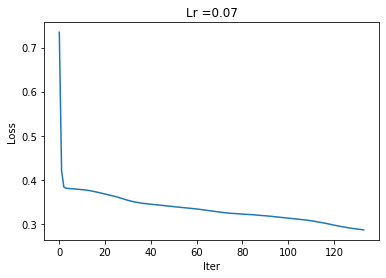

In [171]:
#Running the gradient descent algorithm through a few thousand iterations.
#N plotting a loss function curve
nn.gd(x, y, iter = 67000)

In [172]:
#Using model to predict and calculate accuracy
pred_train = nn.pred(x, y)
#Checking model performance on unseen data
pred_test = nn.pred(xval, yval)

Acc: 0.8530000000000003
Acc: 0.8187919463087246


The network has an accuracy of a 85% on the training set  and of 81.9% when using the validation set.

In [173]:
#Viewing outputs of the network
nn.X,nn.Y=xval, yval 
yvalh, loss = nn.forward()
print("\ny",np.around(yval[:,0:50,], decimals=0).astype(np.int))       
print("\nyh",np.around(yvalh[:,0:50,], decimals=0).astype(np.int),"\n")


y [[0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0
  0 0 0 1 0 0 1 0 0 0 0 0 0 0]]

yh [[0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0
  0 0 0 1 0 0 1 0 0 0 0 0 0 0]] 

